In [1]:
import pandas as pd

# Load the datasets
health_18_and_under = pd.read_csv('Health insurance (18 and under) (1).csv')
health_18_to_64 = pd.read_csv('Health insurance (18 to 64) (1).csv')

# Add a new column to distinguish between the two datasets
health_18_and_under['dataset'] = '18_and_under'
health_18_to_64['dataset'] = '18_to_64'

# Merge the two datasets on common columns with different names
merged_data = pd.merge(health_18_and_under, health_18_to_64, left_on=['year', 'fips', 'state_fips', 'county_fips', 'county_name', 'state_name', 'state_abbr', 'metro_nonmetro'], right_on=['year', 'fips', 'state_fips', 'county_fips', 'county_name', 'state_name', 'state_abbr', 'metro_nonmetro'])

# Save the merged dataset to a new Excel file
merged_data.to_csv('merged_insurance_data.csv', index=False)

In [2]:
dataset_final = pd.read_csv('merged_insurance_data.csv')

In [3]:
dataset_final.head()

,year,fips,state_fips,county_fips,county_name,state_name,state_abbr,metro_nonmetro,uninsured_x,population_18under,dataset_x,uninsured_y,population_18to64,dataset_y
0,2008,1001,1,1,Autauga County,Alabama,AL,Metropolitan,1035,13774,18_and_under,4933,31300,18_to_64
1,2009,1001,1,1,Autauga County,Alabama,AL,Metropolitan,860,14722,18_and_under,5492,30571,18_to_64
2,2011,1001,1,1,Autauga County,Alabama,AL,Metropolitan,712,15037,18_and_under,6065,33764,18_to_64
3,2014,1001,1,1,Autauga County,Alabama,AL,Metropolitan,504,14525,18_and_under,4780,33627,18_to_64
4,2013,1001,1,1,Autauga County,Alabama,AL,Metropolitan,573,14638,18_and_under,5845,33539,18_to_64


In [4]:
print(merged_data.describe())
print(health_18_and_under.describe())
print(health_18_to_64.describe())


               year          fips    state_fips   county_fips    uninsured_x  \
count  25141.000000  25141.000000  25141.000000  25141.000000   25141.000000   
mean    2011.499901  30389.848137     30.286146    103.702001    1874.317251   
std        2.291203  15161.305000     15.143056    107.896622    8049.761602   
min     2008.000000   1001.000000      1.000000      1.000000       0.000000   
25%     2010.000000  18177.000000     18.000000     35.000000     205.000000   
50%     2011.000000  29177.000000     29.000000     79.000000     463.000000   
75%     2013.000000  45083.000000     45.000000    133.000000    1183.000000   
max     2015.000000  56045.000000     56.000000    840.000000  333539.000000   

       population_18under   uninsured_y  population_18to64  
count        2.514100e+04  2.514100e+04       2.514100e+04  
mean         2.437513e+04  1.163419e+04       6.071559e+04  
std          8.050543e+04  4.898463e+04       2.009160e+05  
min          0.000000e+00  0.000000

In [5]:
merged_data.rename(columns={'uninsured_x': 'uninsured_18_and_under', 'population_18under_18_and_under': 'population_18under', 'dataset_x': 'dataset_18_and_under',
                             'uninsured_y': 'uninsured_18_to_64', 'population_18to64_18_to_64': 'population_18to64', 'dataset_y': 'dataset_18_to_64'}, inplace=True)


In [6]:
print(merged_data.describe())

               year          fips    state_fips   county_fips  \
count  25141.000000  25141.000000  25141.000000  25141.000000   
mean    2011.499901  30389.848137     30.286146    103.702001   
std        2.291203  15161.305000     15.143056    107.896622   
min     2008.000000   1001.000000      1.000000      1.000000   
25%     2010.000000  18177.000000     18.000000     35.000000   
50%     2011.000000  29177.000000     29.000000     79.000000   
75%     2013.000000  45083.000000     45.000000    133.000000   
max     2015.000000  56045.000000     56.000000    840.000000   

       uninsured_18_and_under  population_18under  uninsured_18_to_64  \
count            25141.000000        2.514100e+04        2.514100e+04   
mean              1874.317251        2.437513e+04        1.163419e+04   
std               8049.761602        8.050543e+04        4.898463e+04   
min                  0.000000        0.000000e+00        0.000000e+00   
25%                205.000000        2.582000e+03

In [7]:
# Calculate mean and median
central_tendency = merged_data[['uninsured_18_and_under', 'population_18under', 'uninsured_18_to_64', 'population_18to64']
].agg(['mean', 'median'])
print(central_tendency)


        uninsured_18_and_under  population_18under  uninsured_18_to_64  \
mean               1874.317251        24375.125373        11634.194463   
median              463.000000         6139.000000         2936.000000   

        population_18to64  
mean         60715.586174  
median       14896.000000  


In [8]:
# Calculate range
data_range = merged_data[['uninsured_18_and_under', 'population_18under', 'uninsured_18_to_64', 'population_18to64']
].agg(lambda x: x.max() - x.min())
print(data_range)


uninsured_18_and_under     333539
population_18under        2668567
uninsured_18_to_64        2002197
population_18to64         6507904
dtype: int64


In [9]:
print(merged_data.isnull().sum())

year                      0
fips                      0
state_fips                0
county_fips               0
county_name               0
state_name                0
state_abbr                0
metro_nonmetro            0
uninsured_18_and_under    0
population_18under        0
dataset_18_and_under      0
uninsured_18_to_64        0
population_18to64         0
dataset_18_to_64          0
dtype: int64


In [10]:
# Check data types to identify categorical variables
print(merged_data.dtypes)


year                       int64
fips                       int64
state_fips                 int64
county_fips                int64
county_name               object
state_name                object
state_abbr                object
metro_nonmetro            object
uninsured_18_and_under     int64
population_18under         int64
dataset_18_and_under      object
uninsured_18_to_64         int64
population_18to64          int64
dataset_18_to_64          object
dtype: object


EDA


In [11]:
# Generate summary statistics for numerical variables
numerical_summary = merged_data.describe()

# Display the summary statistics
print(numerical_summary)


               year          fips    state_fips   county_fips  \
count  25141.000000  25141.000000  25141.000000  25141.000000   
mean    2011.499901  30389.848137     30.286146    103.702001   
std        2.291203  15161.305000     15.143056    107.896622   
min     2008.000000   1001.000000      1.000000      1.000000   
25%     2010.000000  18177.000000     18.000000     35.000000   
50%     2011.000000  29177.000000     29.000000     79.000000   
75%     2013.000000  45083.000000     45.000000    133.000000   
max     2015.000000  56045.000000     56.000000    840.000000   

       uninsured_18_and_under  population_18under  uninsured_18_to_64  \
count            25141.000000        2.514100e+04        2.514100e+04   
mean              1874.317251        2.437513e+04        1.163419e+04   
std               8049.761602        8.050543e+04        4.898463e+04   
min                  0.000000        0.000000e+00        0.000000e+00   
25%                205.000000        2.582000e+03

The standard deviation for uninsured individuals aged 18 to 64 is relatively high, indicating variability in this variable across different regions.


The 25th percentile (Q1) for the population under 18 is around 2,582, meaning that 25% of the regions have a population under 18 less than or equal to this value.

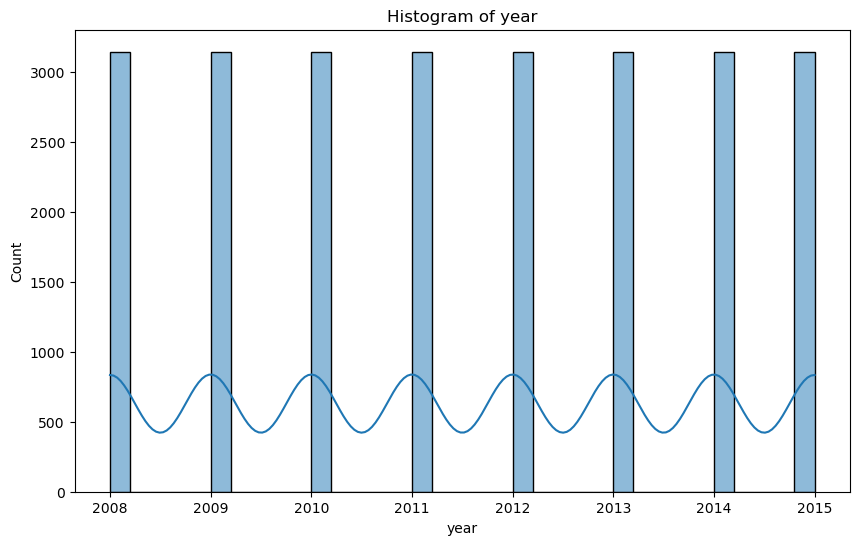

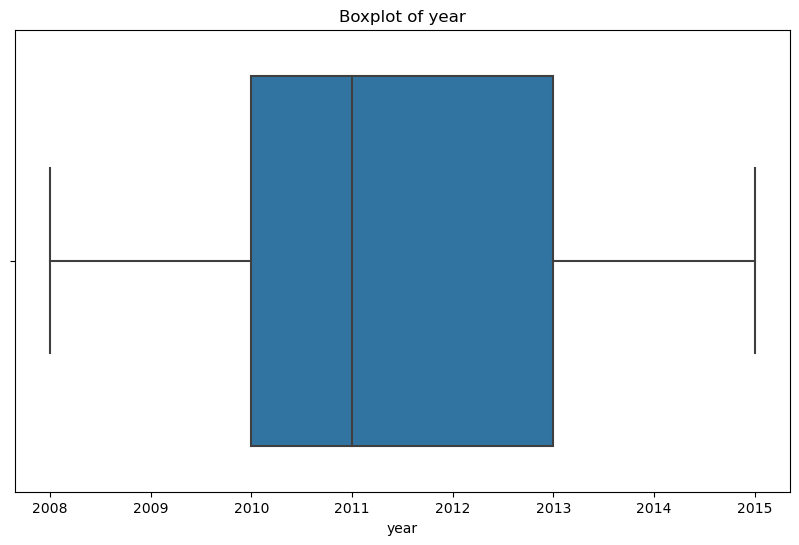

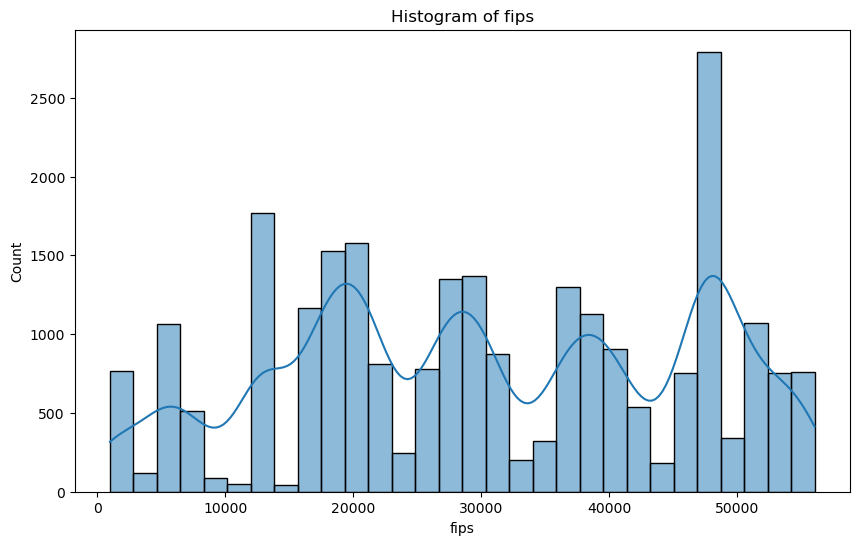

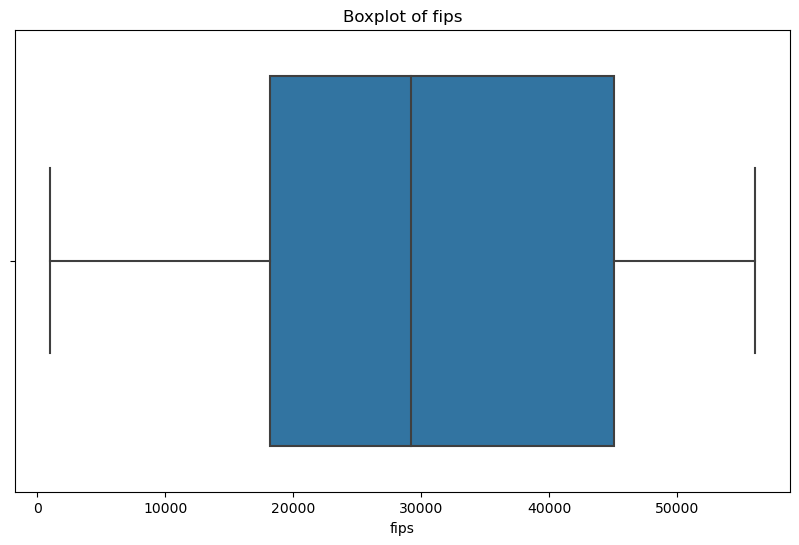

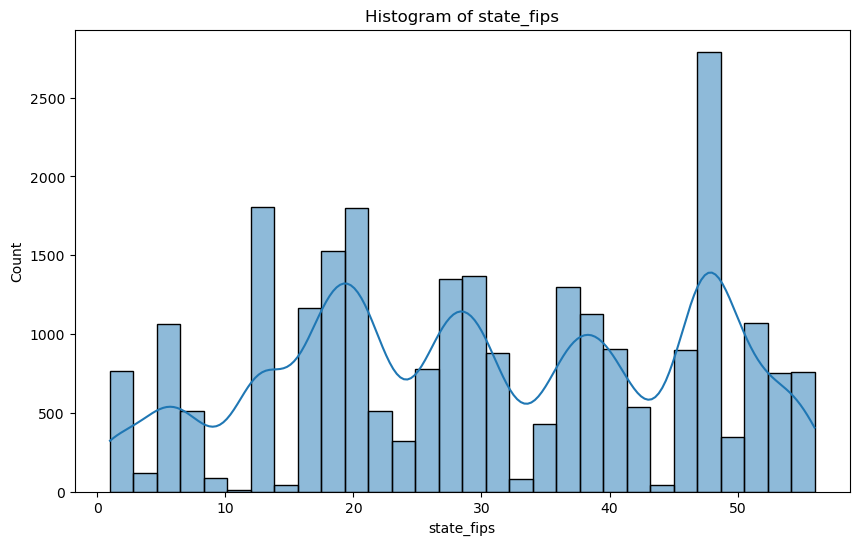

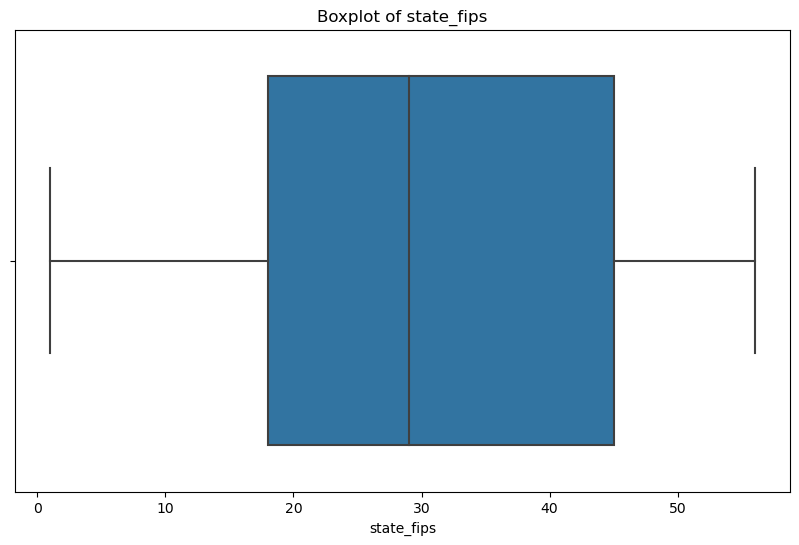

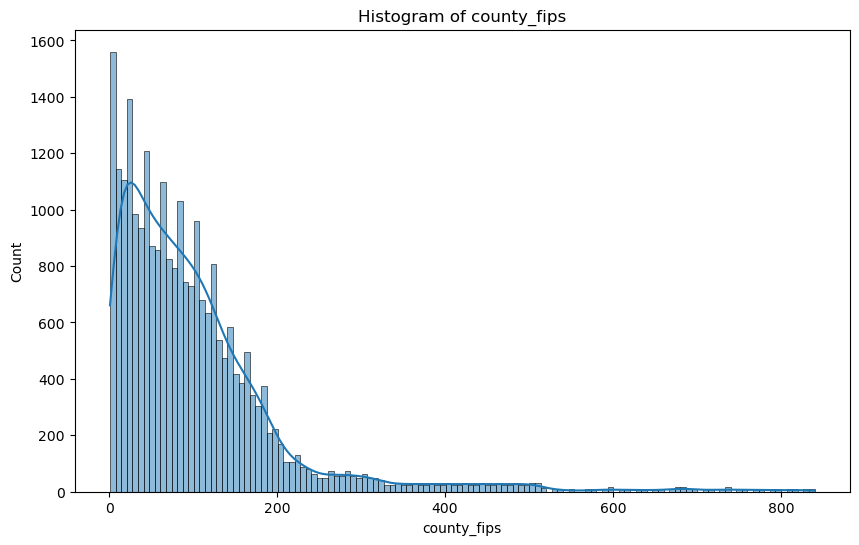

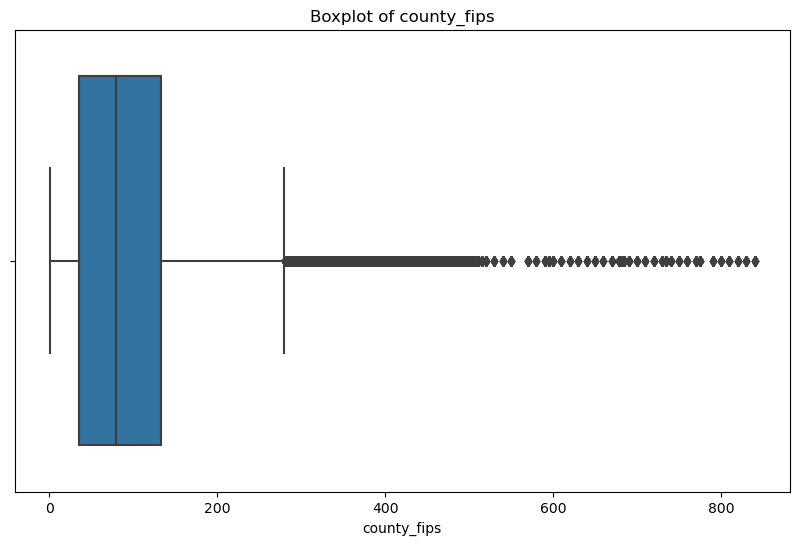

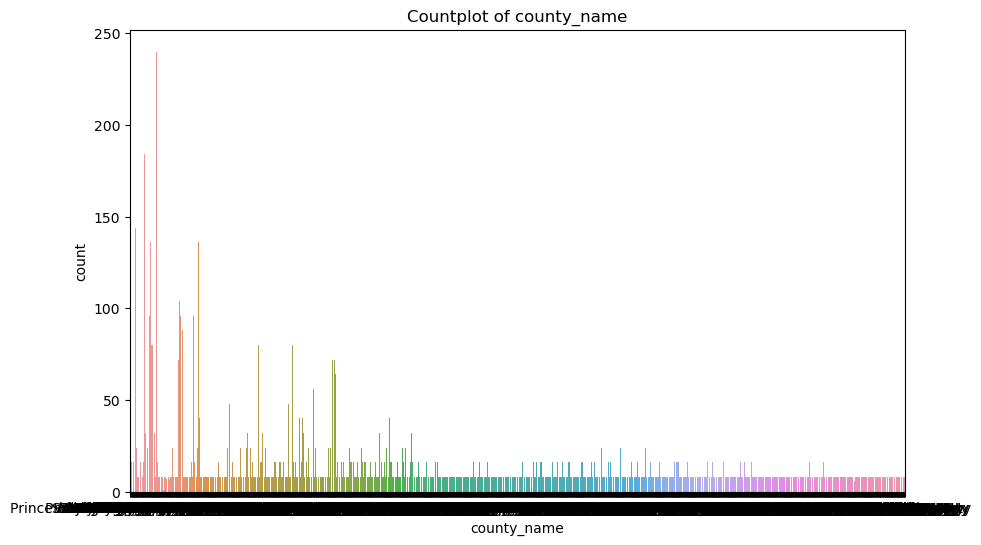

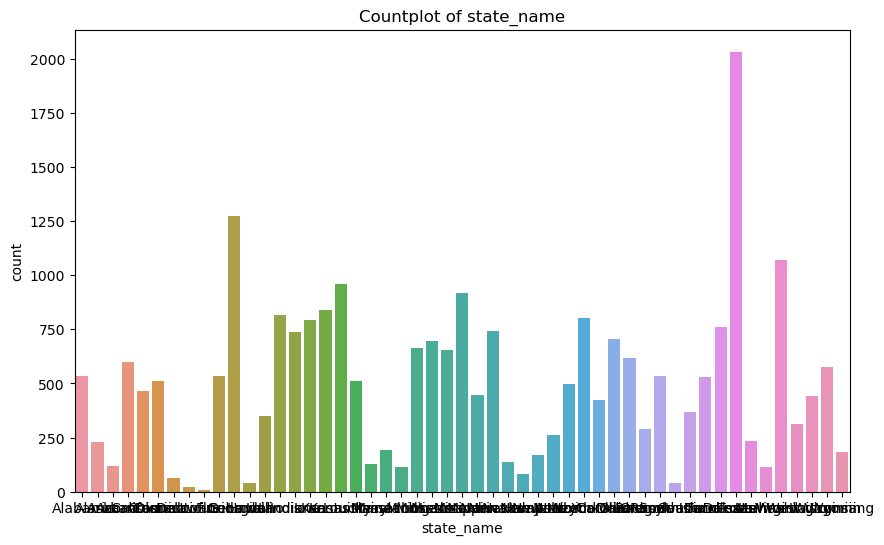

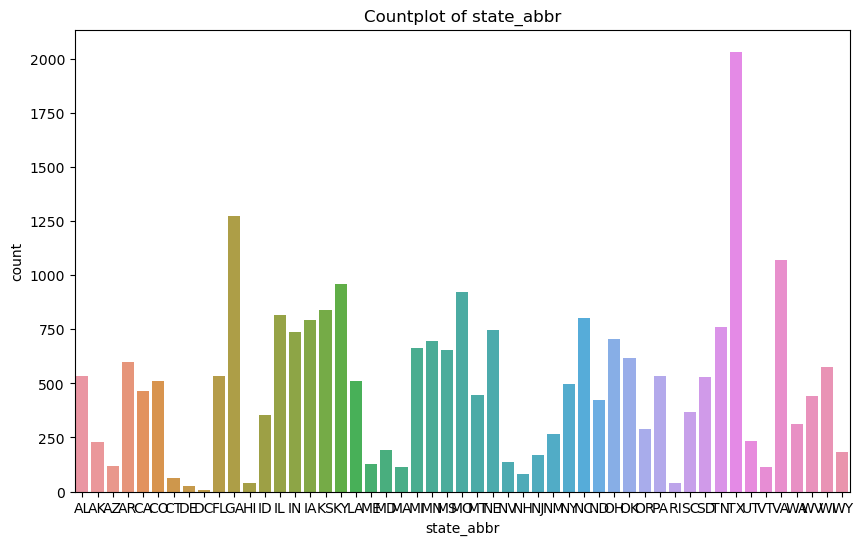

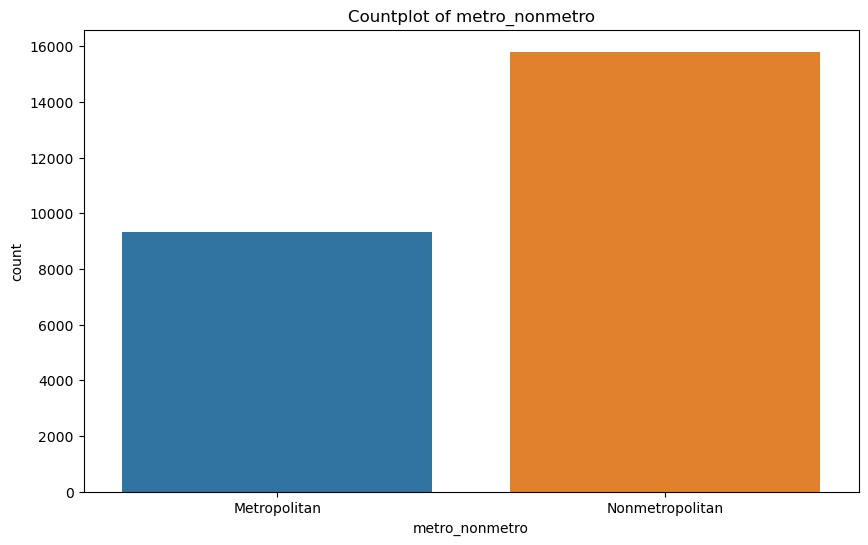

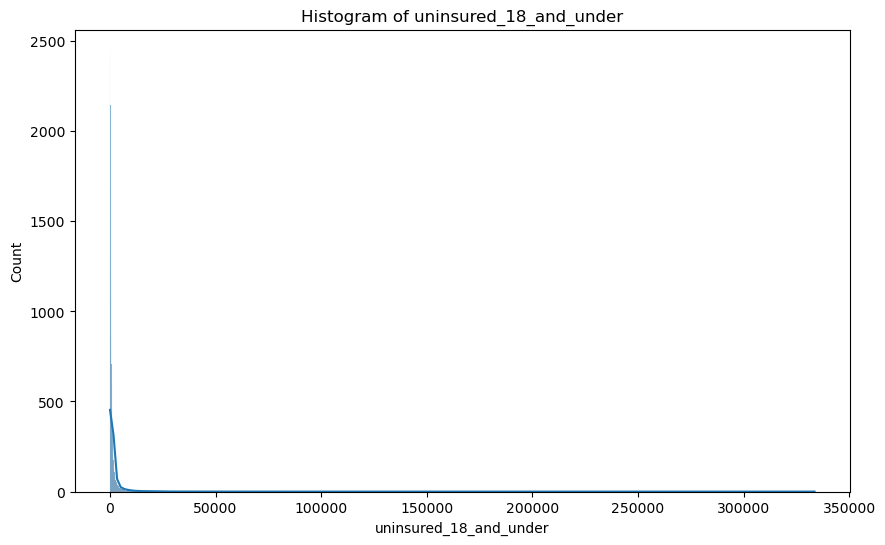

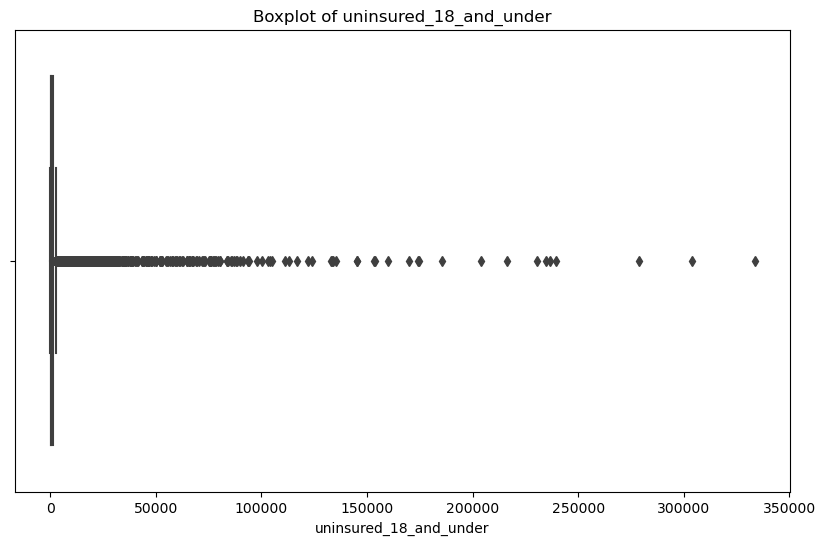

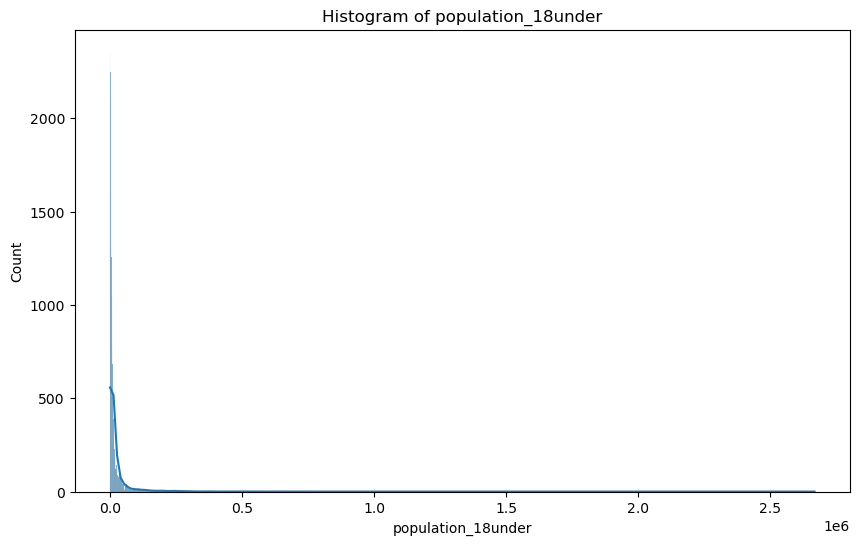

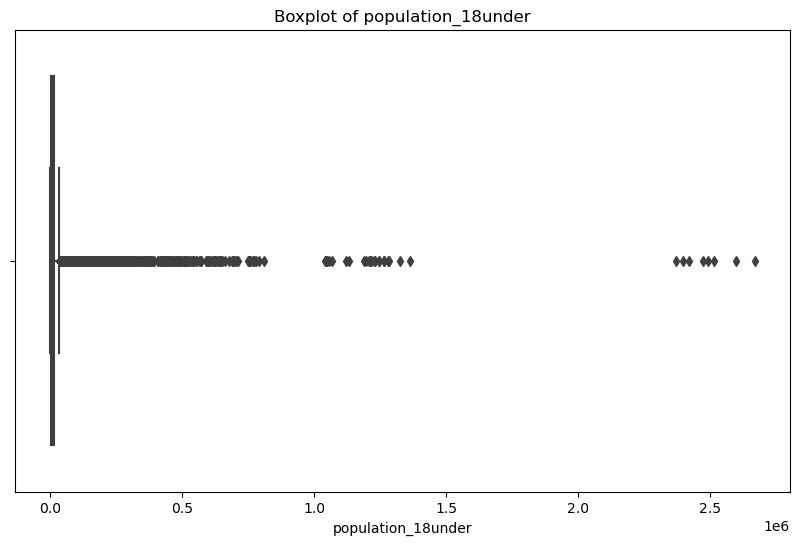

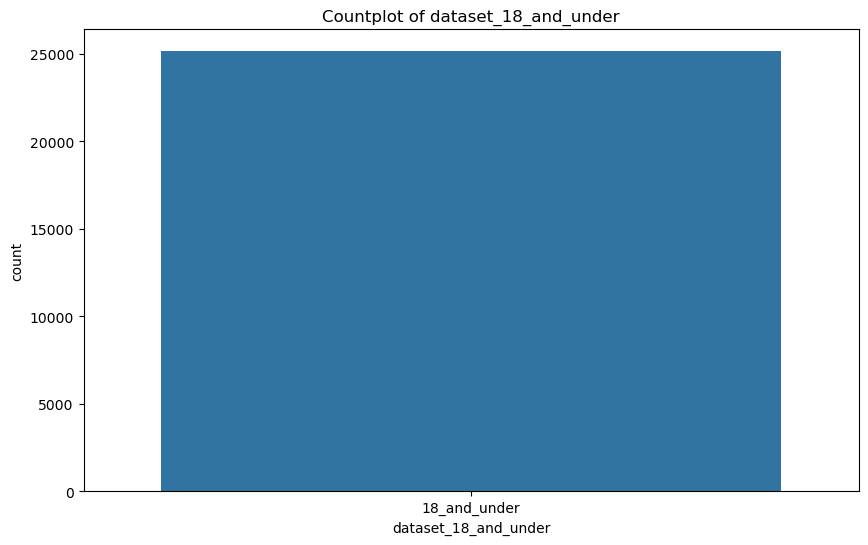

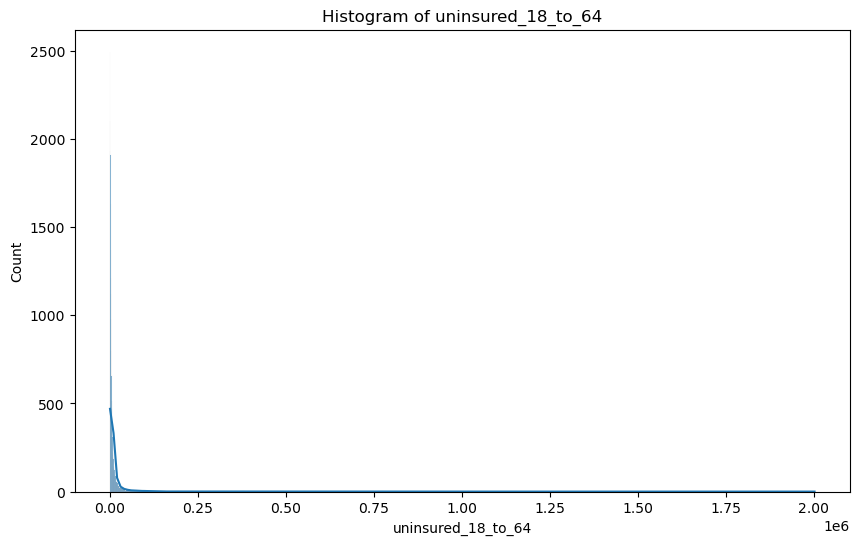

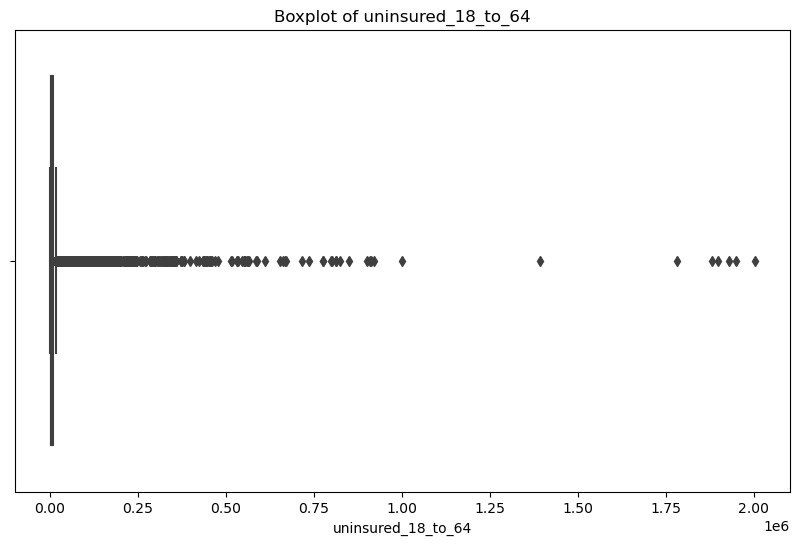

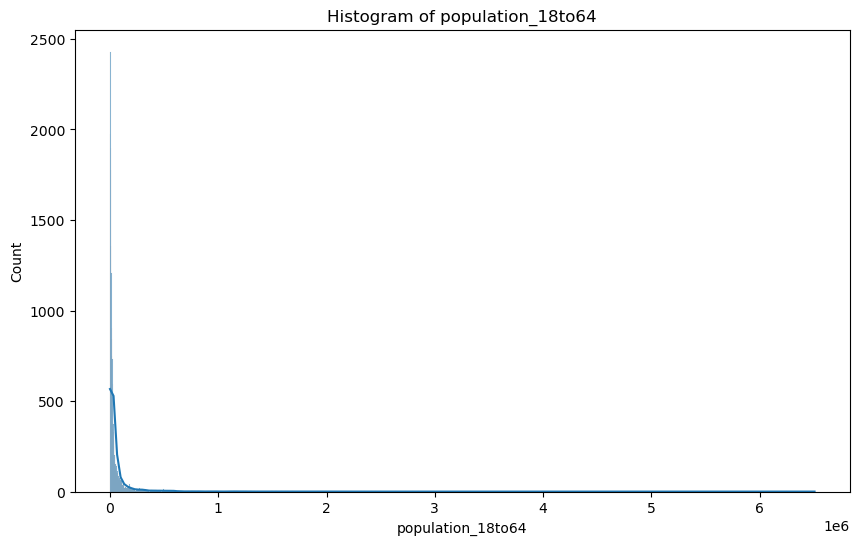

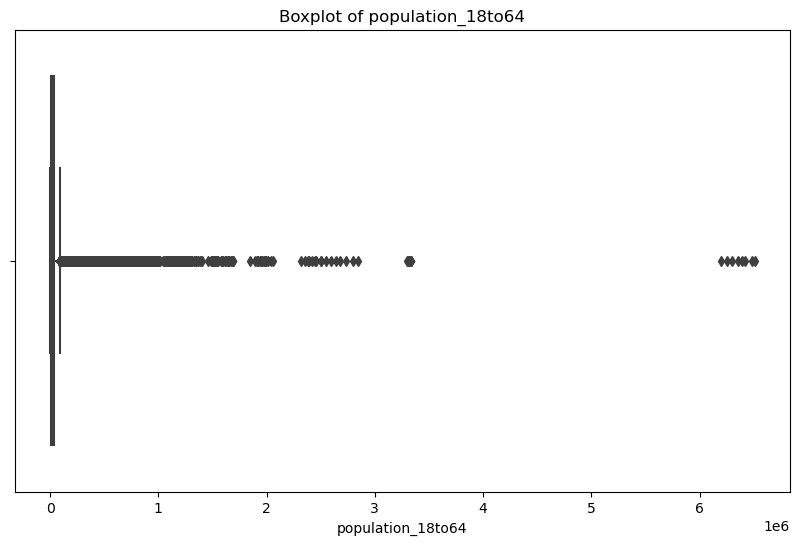

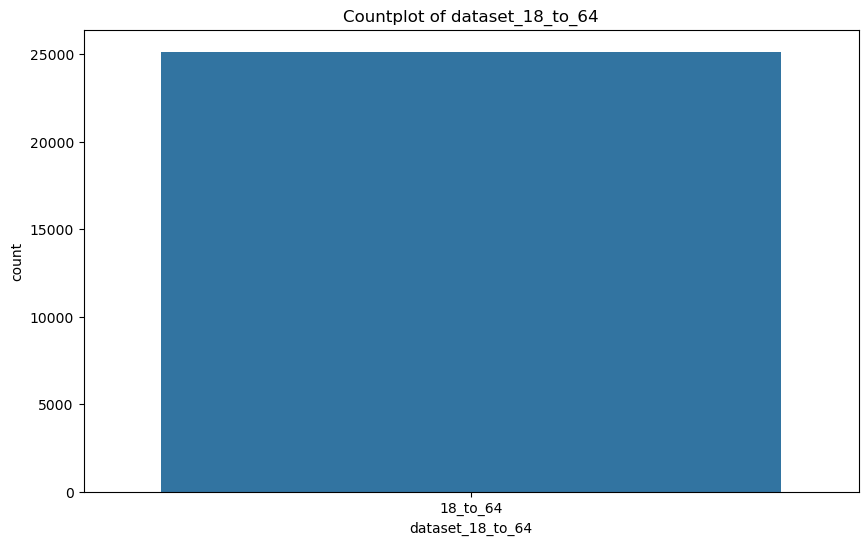

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to automatically generate plots for a DataFrame
def generate_plots(data):
    # Get column names and data types
    column_types = data.dtypes

    # Iterate through columns
    for column in data.columns:
        column_type = column_types[column]

        # Check data type and generate plot accordingly
        if column_type == 'int64' or column_type == 'float64':
            # Numerical variables
            plt.figure(figsize=(10, 6))
            sns.histplot(data[column], kde=True)
            plt.title(f'Histogram of {column}')
            plt.show()

            plt.figure(figsize=(10, 6))
            sns.boxplot(x=data[column])
            plt.title(f'Boxplot of {column}')
            plt.show()

        elif column_type == 'object':
            # Categorical variables
            plt.figure(figsize=(10, 6))
            sns.countplot(x=data[column])
            plt.title(f'Countplot of {column}')
            plt.show()

# Call the function with your dataset
generate_plots(merged_data)


C:\Users\katre\AppData\Local\Temp\ipykernel_5236\4026078939.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_data['population_18under'] - merged_data['uninsured_18_and_under'])


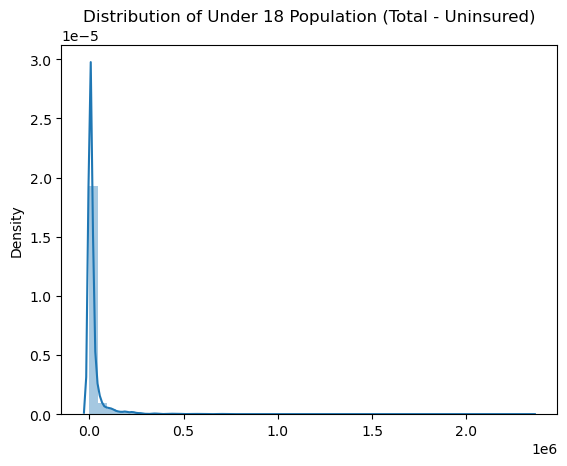

C:\Users\katre\AppData\Local\Temp\ipykernel_5236\4026078939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_data['population_18to64'] - merged_data['uninsured_18_to_64'])


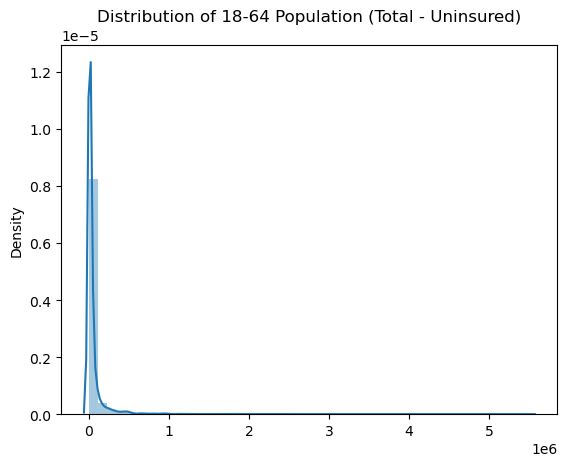

C:\Users\katre\AppData\Local\Temp\ipykernel_5236\4026078939.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


                            year      fips  state_fips  county_fips  \
year                    1.000000 -0.000259   -0.000256    -0.000419   
fips                   -0.000259  1.000000    0.999975     0.172589   
state_fips             -0.000256  0.999975    1.000000     0.165672   
county_fips            -0.000419  0.172589    0.165672     1.000000   
uninsured_18_and_under -0.042005 -0.039574   -0.039541    -0.011348   
population_18under     -0.001314 -0.053845   -0.053596    -0.044129   
uninsured_18_to_64     -0.020041 -0.051398   -0.051291    -0.023714   
population_18to64       0.004261 -0.055139   -0.054852    -0.049620   

                        uninsured_18_and_under  population_18under  \
year                                 -0.042005           -0.001314   
fips                                 -0.039574           -0.053845   
state_fips                           -0.039541           -0.053596   
county_fips                          -0.011348           -0.044129   
uninsured_

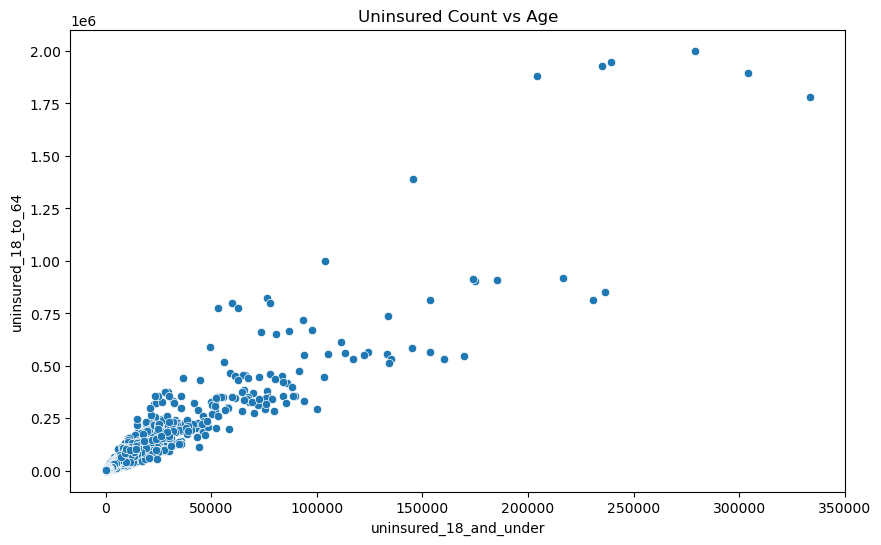

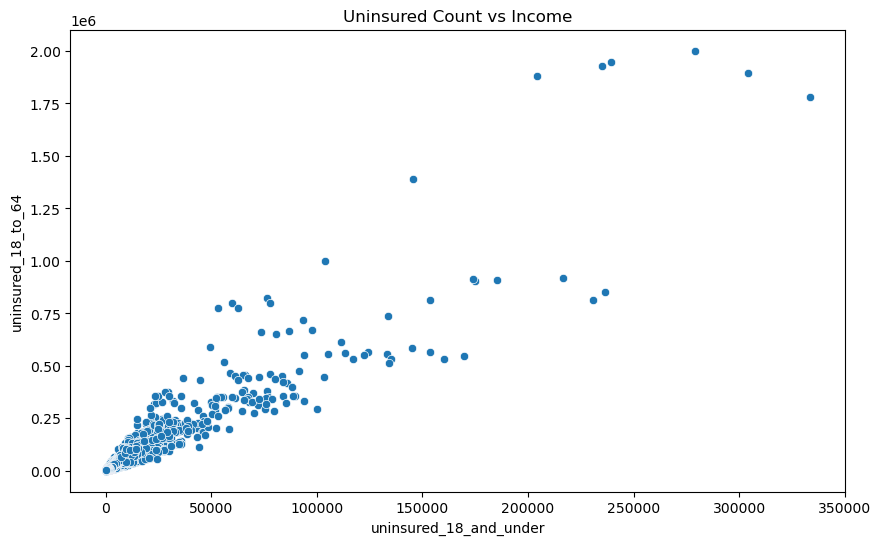

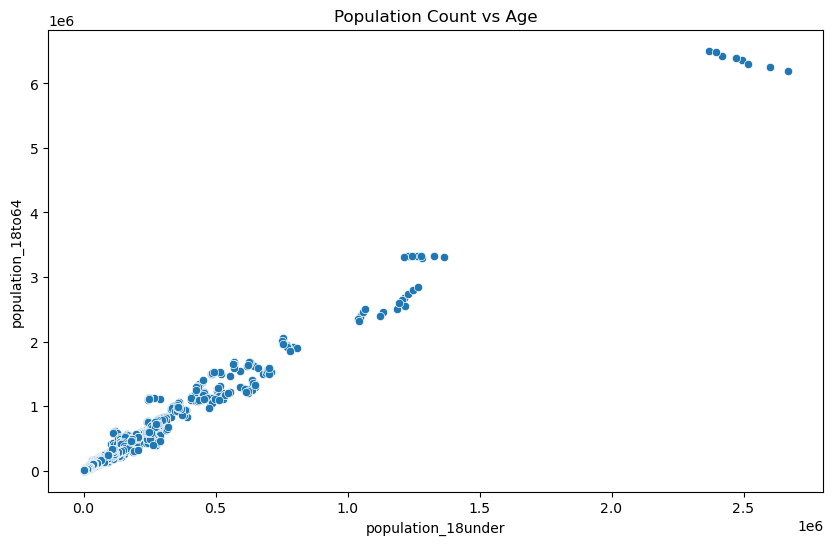

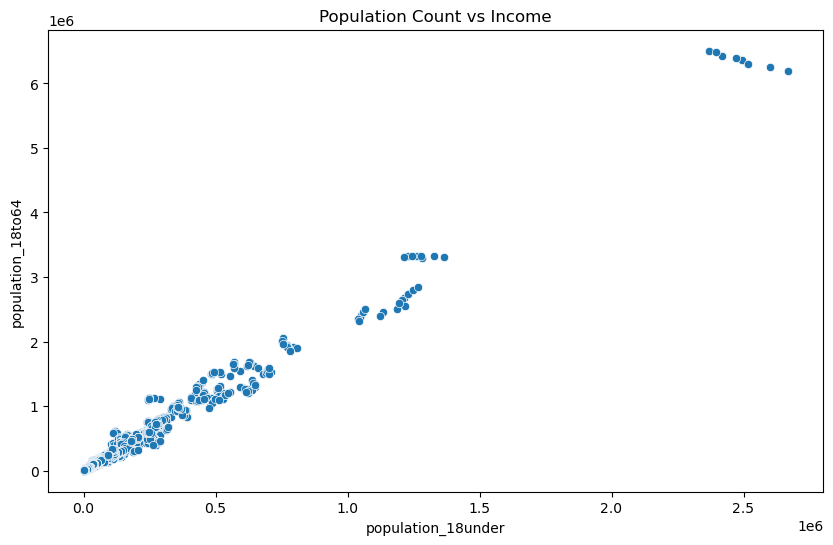

In [16]:

# Display the distribution of the population and uninsured populations
sns.distplot(merged_data['population_18under'] - merged_data['uninsured_18_and_under'])
plt.title('Distribution of Under 18 Population (Total - Uninsured)')
plt.show()

sns.distplot(merged_data['population_18to64'] - merged_data['uninsured_18_to_64'])
plt.title('Distribution of 18-64 Population (Total - Uninsured)')
plt.show()

# Correlation between variables
correlation_matrix = merged_data.corr()
print(correlation_matrix)

# Scatter plot to analyze the relationship between uninsured count and age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='uninsured_18_and_under', y='uninsured_18_to_64', data=merged_data)
plt.title('Uninsured Count vs Age')
plt.show()

# Scatter plot to analyze the relationship between uninsured count and income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='uninsured_18_and_under', y='uninsured_18_to_64', data=merged_data)
plt.title('Uninsured Count vs Income')
plt.show()

# Scatter plot to analyze the relationship between population count and age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population_18under', y='population_18to64', data=merged_data)
plt.title('Population Count vs Age')
plt.show()

# Scatter plot to analyze the relationship between population count and income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population_18under', y='population_18to64', data=merged_data)
plt.title('Population Count vs Income')
plt.show()
